### Solving the problem of underfiting
#### reasons 
I only choose the classcical variables, sex, class, age. But losing many important information ,such as fare, family size
#### improvement
- chosse more features to solve the porblem of underfitting

In [132]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.model_selection as model_selection
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



In [133]:
train_df = pd.read_csv('/Users/ben/Notebook/input/titanic/train.csv')
test_df = pd.read_csv('/Users/ben/Notebook/input/titanic/test.csv')
combine = [train_df, test_df]



In [134]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [135]:
for dataset in combine:
    dataset.drop(['Ticket','Cabin'], axis=1, inplace=True)

In [136]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [137]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop(['SibSp','Parch'], axis=1, inplace=True)    

In [138]:
for dataset in combine:
    dataset['title']=dataset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())


newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

for dataset in combine:
    dataset['title']=dataset.title.map(newtitles)

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs


From the distribution above, the young between(20, 30) has a lower survival. While the older(70-80) and the infant has a higher survival. 


In [139]:
train_df.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [140]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [141]:
train_df.Age=train_df[['title','Sex','Age']].apply(newage, axis=1)
test_df.Age=test_df[['title','Sex','Age']].apply(newage, axis=1)

In [142]:
train_df.Fare=train_df.Fare.fillna(train_df.Fare.mean())
test_df.Fare=test_df.Fare.fillna(test_df.Fare.mean())
train_df.Embarked=train_df.Embarked.fillna(train_df.Embarked.mode()[0])

In [143]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
title          0
dtype: int64

### Feature extraction

In [144]:
for dataset in combine:
    dataset.drop(['Name'], axis=1, inplace= True)


In [145]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs


In [146]:
for dataset in combine: 
    dataset.loc[dataset['Sex']=='male', 'Sex'] = 1
    dataset.loc[dataset['Sex']=='female', 'Sex'] = 2
for dataset in combine:
    dataset.loc[dataset['Embarked']=='C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked']=='Q', 'Embarked'] = 2
    dataset.loc[dataset['Embarked']=='S', 'Embarked'] = 3


In [147]:
dump_train = train_df
dump_test = test_df
dump_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,1,22.0,7.2500,3,1,Mr
1,2,1,1,2,38.0,71.2833,1,1,Mrs


In [148]:
titles_map={
    "Officer":  1,
    "Royalty":   2,
    "Mrs":      3,
    "Miss":       4,
    "Mr" :      5,
    "Master" :  6}
for dataset in combine:
    dataset['title']=dataset.title.map(titles_map)

In [149]:

label = LabelEncoder()
for dataset in combine:   
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['AgeBin_Code'] = dataset['AgeBin_Code'] + 1
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['FareBin_Code'] = dataset['FareBin_Code'] + 1
    dataset['Pclass_Age'] =  dataset['AgeBin_Code']/dataset['Pclass']
    dataset['Pclass_Fare'] =  dataset['FareBin_Code'] / dataset['Pclass']

for dataset in combine:
    dataset.drop(['Fare', 'Age', 'AgeBin', 'FareBin'], inplace = True, axis = 1)



In [150]:
for dataset in combine:
    dataset.drop(['PassengerId'], inplace = True, axis = 1)

test_df.head(2)

,Pclass,Sex,Embarked,FamilySize,title,AgeBin_Code,FareBin_Code,Pclass_Age,Pclass_Fare
0,3,1,2,0,5,3,1,1.000000,0.333333
1,3,2,3,1,3,4,1,1.333333,0.333333


In [151]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df
X_test.shape

(418, 9)

In [152]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(X_train, Y_train, random_state = 0)
print(train1_x.shape)
print(test1_x.shape)

(668, 9)
(223, 9)


In [153]:
X_train = train1_x
Y_train = train1_y
X_train.isnull().sum()

Pclass          0
Sex             0
Embarked        0
FamilySize      0
title           0
AgeBin_Code     0
FareBin_Code    0
Pclass_Age      0
Pclass_Fare     0
dtype: int64

In [154]:
## # Support Vector Machines with  tuning the parameter by cross validation 
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X_train.astype(float), Y_train,scoring='accuracy', cv=5)

np.mean(scores_svm)

0.8144091572214117

In [155]:
model=GSSVM.fit(X_train, Y_train)

In [156]:
train_prec = model.predict(X_train)
dump_X_train = X_train
dump_X_train['Survived'] = Y_train
a = (train_prec != Y_train)
dd = dump_X_train[a==True]
print(dd.head())


     Pclass  Sex  Embarked  FamilySize  title  AgeBin_Code  FareBin_Code  \
68        3    2         3           6      4            2             2   
271       3    1         3           0      5            2             1   
882       3    2         3           0      4            2             2   
680       3    2         2           0      4            2             2   
49        3    2         3           1      3            2             3   

     Pclass_Age  Pclass_Fare  Survived  
68     0.666667     0.666667         1  
271    0.666667     0.333333         1  
882    0.666667     0.666667         0  
680    0.666667     0.666667         0  
49     0.666667     1.000000         0  


In [157]:
var_name = ['Pclass', 'Sex', 'FamilySize', 'title', 'Embarked']

for var in var_name:
    print(dd.groupby([var]).Survived.count())
    print("\n")

dd.groupby(['Pclass', 'Sex']).Survived.count()

Pclass
1    30
2    12
3    63
Name: Survived, dtype: int64


Sex
1    64
2    41
Name: Survived, dtype: int64


FamilySize
0    69
1    20
2    10
3     2
6     4
Name: Survived, dtype: int64


title
1     1
3    15
4    26
5    62
6     1
Name: Survived, dtype: int64


Embarked
1    20
2     7
3    78
Name: Survived, dtype: int64




Pclass  Sex
1       1      27
        2       3
2       1       7
        2       5
3       1      30
        2      33
Name: Survived, dtype: int64

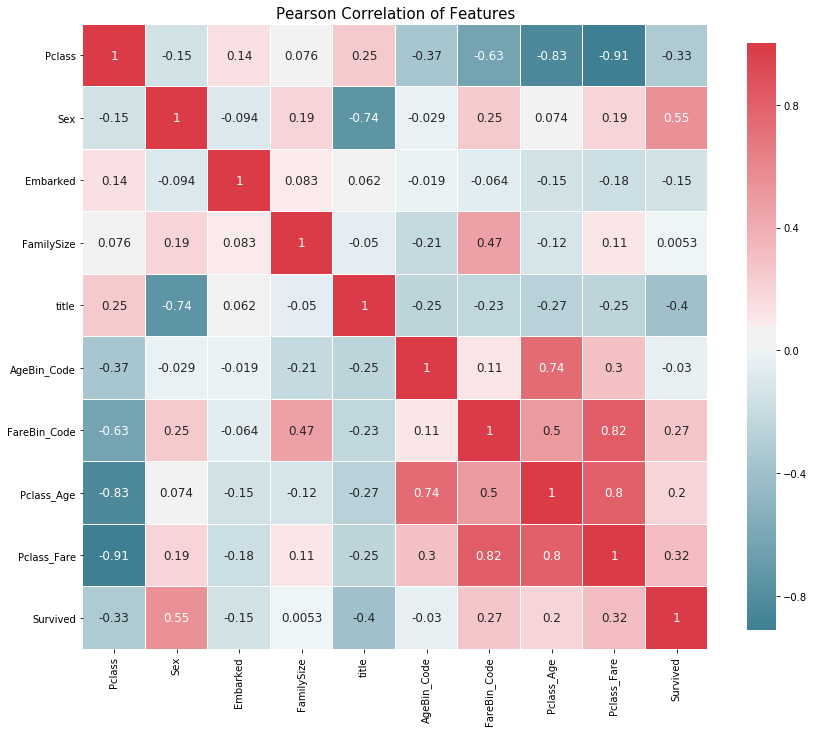

In [158]:

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(X_train)

In [159]:
test1_prec=model.predict(test1_x)
test_accr = calAccuracy(test1_prec, test1_y)
print(test_accr)

0.8161434977578476


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The

[ 50 100 200 300 400]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


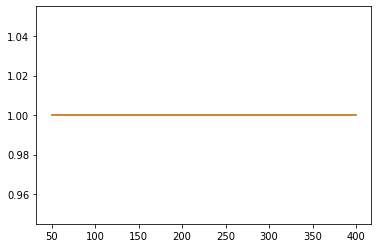

In [160]:
# plotting the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, Y_train, train_sizes=[50, 100, 200,300,400], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

train_scores = train_scores.mean(axis=1)
valid_scores = valid_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, valid_scores, label = 'valid_scores error')

In [161]:
## Predict the final test data
Y_pred = model.predict(X_test)

In [163]:
def calAccuracy(Y_pred, test1_y):
    res = Y_pred == test1_y
    sum(res == False)
    sum(res == True)
    res = sum(res == True)/float(test1_y.shape[0])
    return res

In [365]:
new_test_df = pd.read_csv('./input/titanic/test.csv')
new_test_df.head(5)
new_test_df.shape
new_test_df['Age'].isnull().sum()
new_test_df.shape

(418, 11)

In [366]:
Y_pred.shape

(418,)

In [164]:
new_test_df = pd.read_csv('/Users/ben/Notebook/input/titanic/test.csv')

In [165]:
submission = pd.DataFrame({
        "PassengerId": new_test_df["PassengerId"],
        "Survived": Y_pred
    })

In [166]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [169]:
submission.to_csv("/Users/ben/Notebook/submit.csv", index=False)


### Conclusion 
In this part, I increase the accuracy from 78% to 79% by adding more features

### Problem, still underfitting, how to choose a better feature or combinational feature?


### TODO list
- How to get to know my feature is better or not. Deleting some features? and adding some pylynominal features? Go to see the popular kernel to get help
- how to judge different models, that is how to choose model.